In [1]:
#importar librerias 
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization 
from keras import regularizers, utils


%matplotlib inline

Using TensorFlow backend.


In [2]:
#Generacion de datos

x = np.linspace(-1,1,100)
y=[]

#Polinomio

for i in range(len(x)):
    y.append((x[i]**3)*np.random.random()+np.random.random()*0.1)


"""
#funcion seno 
x = np.linspace(-2,2,100)
for i in range(len(x)):
    y.append((np.sin(i)))
"""


'\n#funcion seno \nx = np.linspace(-2,2,100)\nfor i in range(len(x)):\n    y.append((np.sin(i)))\n'

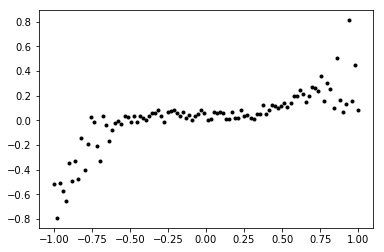

In [3]:
#Figura del data set

plt.plot(x,y,'.k')

In [7]:
#Ajuste usando KERAS

model = Sequential()

#Se diseña una red la cual va estar compactada, por eso se usa Sequential(), la red se va a llamar "model"



model.add(Dense(4, input_dim=1))
model.add(BatchNormalization())
model.add(Dense(1, input_dim=4, activation='relu' 
                #kernel_initializer='random_uniform',
                #kernel_regularizer=regularizers.l1(0.01)
                #activity_regularizer=regularizers.l1(0.01)
               ))


#model.add(Dense(1, input_dim=64))

#Se crea 3 capas, con .add() se agraga una capa. La Dense() habla sobre el numero de hilos de cada capa.
#Como el data set solo tiene una dimension se debe especificar eso y por tanto se usna input_dim =1.
#Además el primer parametro de Dense() indica la dimencion del output

"""
NOTA: el mejor ajuste se obtiene de solo poner activacion en la segunda red.
"""

#model.add(Dense(1, input_shape=(16,), activation='relu'))


model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

#compile es el reponsable de correr la red e indicar la forma de los pesos y la activacion. Con este se
#da cavida a crear la funcion de entrenamiento. 


model.fit(x,y, batch_size=5, epochs=50);
#Funcion que realiza en entrenamiento a los datos x y y. batch_size: numero de muestras por cada actualizacion de 
#los gradientes. epochs: indica cuantas veces va hacer el entrenamiento.

predic = model.predict(x)
#muestra las predicciones del modelo con respecto al data set.


Epoch 1/50
100/100 [==============================] - 1s 6ms/step - loss: 0.1849 - mean_squared_error: 0.1849
Epoch 2/50
100/100 [==============================] - 0s 633us/step - loss: 0.0593 - mean_squared_error: 0.0593
Epoch 3/50
100/100 [==============================] - 0s 540us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 4/50
100/100 [==============================] - 0s 644us/step - loss: 0.0529 - mean_squared_error: 0.0529
Epoch 5/50
100/100 [==============================] - 0s 609us/step - loss: 0.0521 - mean_squared_error: 0.0521
Epoch 6/50
100/100 [==============================] - 0s 538us/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 7/50
100/100 [==============================] - 0s 645us/step - loss: 0.0523 - mean_squared_error: 0.0523
Epoch 8/50
100/100 [==============================] - 0s 663us/step - loss: 0.0520 - mean_squared_error: 0.0520
Epoch 9/50
100/100 [==============================] - 0s 690us/step - loss: 0.0520 - mean_squared_error: 0

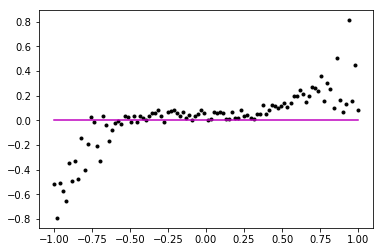

In [8]:
#comparar los dos resultados

plt.plot(x,y,'.k')
plt.plot(x,predic, '-m')

In [ ]:
#visualizacion de la red
from keras.utils import plot_model
from IPython.display import Image

plot_model(model, to_file='model_ex2.png')


Image(filename='./model_ex2.png', width=200)